# Cleaning

In [241]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [243]:
# Import the dataset 
tweets_df = pd.read_csv("/Users/mikey/Downloads/tweets.csv", sep=";")
tweets_df.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


In [244]:
# remove word @,URLS, RT and non alphanumeric characters
def clean_tweet(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    return tweet

In [246]:
# create a new column with the clean text
tweets_df['clean_text'] = tweets_df['text'].apply(clean_tweet)

In [247]:
# we transform to date type 
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df['created_at'] = tweets_df['created_at'].dt.strftime('%d-%m-%Y')


In [248]:
tweets_df

,id,created_at,text,sentiment,clean_text
0,77522,15-04-2020,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,Yo\nEnter to WIN 1000 Monarch Tokens\n\nUS St...
1,661634,25-06-2020,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,SriLanka surcharge on fuel removed\n\nThe surc...
2,413231,04-06-2020,Net issuance increases to fund fiscal programs...,positive,Net issuance increases to fund fiscal programs...
3,760262,03-07-2020,RT @bentboolean: How much of Amazon's traffic ...,positive,How much of Amazons traffic is served by Fast...
4,830153,09-07-2020,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,AMD Ryzen 4000 desktop CPUs looking great and ...
...,...,...,...,...,...
4995,411380,04-06-2020,"With ad revenues falling, what’s the impact on...",NaN,With ad revenues falling whats the impact on s...
4996,62318,14-04-2020,RT @KelvinSCWong: Well another point to add to...,NaN,Well another point to add to dent the current...
4997,627230,23-06-2020,$ITOX working on a contract with a fortune 500...,NaN,ITOX working on a contract with a fortune 500 ...
4998,890123,14-07-2020,"$DIS it could break the 120 pin, then 125&gt; ...",NaN,DIS it could break the 120 pin then 125gt 130 ...


# Sentiment Analysis

In [249]:
# apply the sentiment analysis using sentiment analysis
tweets_df['sentiment'] = tweets_df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)


In [250]:
print(tweets_df[['clean_text', 'sentiment']])

                                             clean_text  sentiment
0      Yo\nEnter to WIN 1000 Monarch Tokens\n\nUS St...   1.000000
1     SriLanka surcharge on fuel removed\n\nThe surc...   0.000000
2     Net issuance increases to fund fiscal programs...   0.128788
3      How much of Amazons traffic is served by Fast...   0.200000
4     AMD Ryzen 4000 desktop CPUs looking great and ...   0.800000
...                                                 ...        ...
4995  With ad revenues falling whats the impact on s...   0.516667
4996   Well another point to add to dent the current...   0.125000
4997  ITOX working on a contract with a fortune 500 ...  -0.200000
4998  DIS it could break the 120 pin then 125gt 130 ...   0.000000
4999  Amedisys Inc AMED COO Christopher Gerard Sells...   0.000000

[5000 rows x 2 columns]


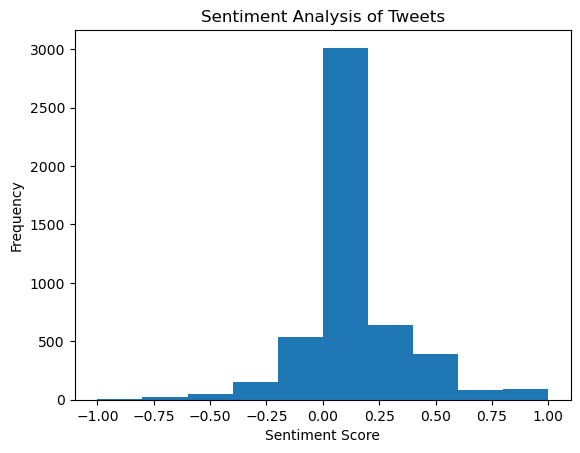

In [251]:
# we graphic sentiment analysis
plt.hist(tweets_df['sentiment'])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Tweets')
plt.show()

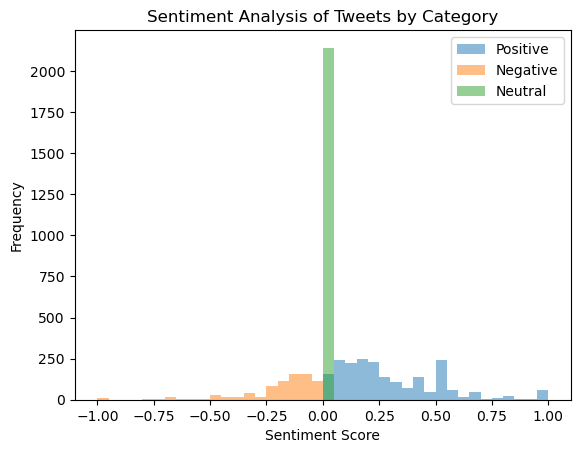

In [252]:
# we graphic by category positive, negative, neutral
pos_tweets = tweets_df[tweets_df['sentiment'] > 0]
neg_tweets = tweets_df[tweets_df['sentiment'] < 0]
neu_tweets = tweets_df[tweets_df['sentiment'] == 0]
plt.hist(pos_tweets['sentiment'], bins=20, alpha=0.5, label='Positive')
plt.hist(neg_tweets['sentiment'], bins=20, alpha=0.5, label='Negative')
plt.hist(neu_tweets['sentiment'], bins=20, alpha=0.5, label='Neutral')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Tweets by Category')
plt.legend(loc='upper right')
plt.show()


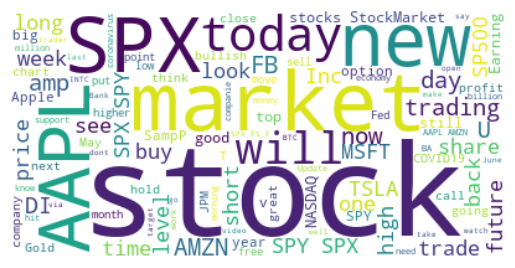

In [253]:
# we do the cloudword of all the tweets
wordcloud = WordCloud(background_color="white").generate(' '.join(tweets_df['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [254]:
# we calculate the average of all the tweets
avg_sentiment = tweets_df['sentiment'].mean()
print(f"Average Sentiment Score: {avg_sentiment:.2f}")

Average Sentiment Score: 0.10


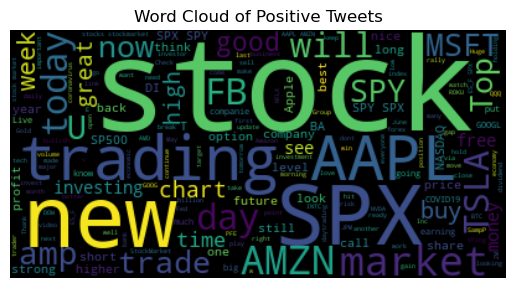

In [255]:
# we do the cloudword of the positives tweets
positive_tweets = tweets_df[tweets_df['sentiment'] > 0]
wordcloud = WordCloud().generate(' '.join(positive_tweets['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Positive Tweets')
plt.show()

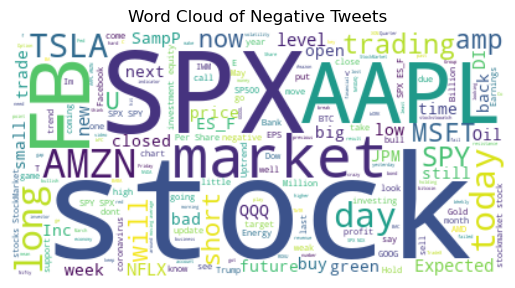

In [256]:
# we do the cloudword of the positives tweets
negative_tweets = tweets_df[tweets_df['sentiment'] < 0]

wordcloud_negative = WordCloud(background_color="white").generate(' '.join(negative_tweets['clean_text']))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Negative Tweets')
plt.show()

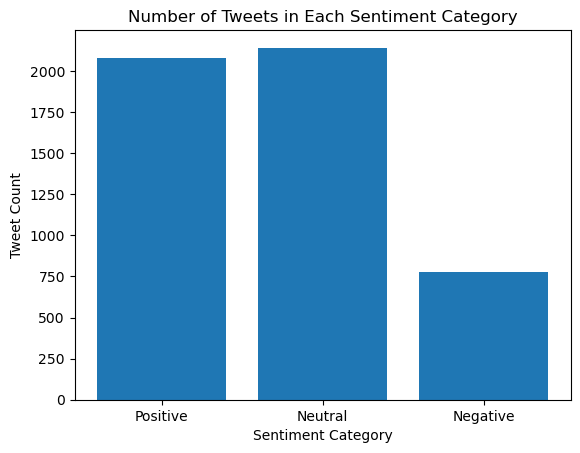

In [257]:
# count the number of tweets in each sentiment category and graphic them 
pos_count = len(pos_tweets)
neg_count = len(neg_tweets)
neu_count = len(neu_tweets)
fig, ax = plt.subplots()
ax.bar(['Positive', 'Neutral', 'Negative'], [pos_count, neu_count, neg_count])
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Tweet Count')
ax.set_title('Number of Tweets in Each Sentiment Category')
plt.show()

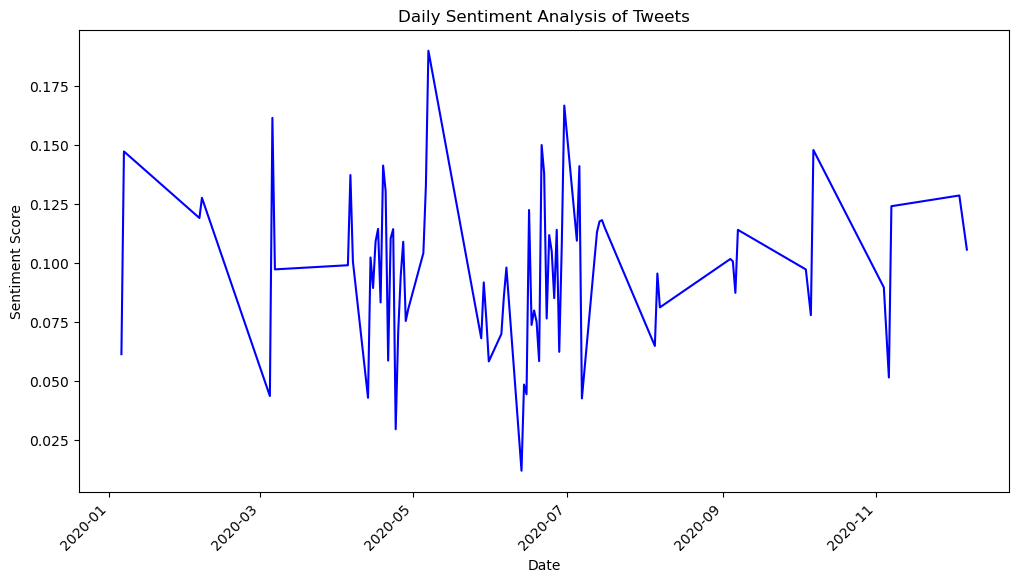

In [293]:
# we graphic the sentiment analysis by month 
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
daily_sentiment = tweets_df.groupby('created_at')['sentiment'].mean()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(daily_sentiment.index, daily_sentiment.values, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Daily Sentiment Analysis of Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

# NER analysis on Positive Tweets 

In [259]:
positive_tweets

,id,created_at,text,sentiment,clean_text
0,77522,15-04-2020,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",1.000000,Yo\nEnter to WIN 1000 Monarch Tokens\n\nUS St...
2,413231,04-06-2020,Net issuance increases to fund fiscal programs...,0.128788,Net issuance increases to fund fiscal programs...
3,760262,03-07-2020,RT @bentboolean: How much of Amazon's traffic ...,0.200000,How much of Amazons traffic is served by Fast...
4,830153,09-07-2020,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,0.800000,AMD Ryzen 4000 desktop CPUs looking great and ...
5,27027,12-04-2020,RT @QuantTrend: Reduce your portfolio RISK! GO...,0.404762,Reduce your portfolio RISK GOLD is a perfect ...
...,...,...,...,...,...
4991,762997,03-07-2020,$FB This didn’t get much playtime this week. I...,0.200000,FB This didnt get much playtime this week It n...
4992,692380,28-06-2020,@willschoebs Connecting two of your excellent ...,0.500000,Connecting two of your excellent tweets The f...
4993,766908,04-07-2020,Your ordinary person would focus on buying pur...,0.116071,Your ordinary person would focus on buying pur...
4995,411380,04-06-2020,"With ad revenues falling, what’s the impact on...",0.516667,With ad revenues falling whats the impact on s...


In [260]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [261]:
def extract_company(text):
    doc = nlp(text)
    company_names = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return company_names


positive_tweets['companies'] = positive_tweets['clean_text'].apply(lambda x: ', '.join(extract_company(x)))

/var/folders/xt/yjtl4jys31763jfkqwb14p1c0000gn/T/ipykernel_4920/3014239110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['companies'] = positive_tweets['clean_text'].apply(lambda x: ', '.join(extract_company(x)))


In [262]:
def extract_persons(text):
    doc = nlp(text)
    company_names = [ent.text for ent in doc.ents if ent.label_ == 'PER']
    return company_names

positive_tweets['Persons'] = positive_tweets['clean_text'].apply(lambda x: ', '.join(extract_persons(x)))

/var/folders/xt/yjtl4jys31763jfkqwb14p1c0000gn/T/ipykernel_4920/394538106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['Persons'] = positive_tweets['clean_text'].apply(lambda x: ', '.join(extract_persons(x)))


In [263]:
def extract_products(text):
    doc = nlp(text)
    company_names = [ent.text for ent in doc.ents if ent.label_ == 'PRODUCT']
    return company_names

positive_tweets['products'] = positive_tweets['clean_text'].apply(lambda x: ', '.join(extract_products(x)))

/var/folders/xt/yjtl4jys31763jfkqwb14p1c0000gn/T/ipykernel_4920/893436956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['products'] = positive_tweets['clean_text'].apply(lambda x: ', '.join(extract_products(x)))


In [264]:
positive_tweets.head()

,id,created_at,text,sentiment,clean_text,companies,Persons,products
0,77522,15-04-2020,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",1.000000,Yo\nEnter to WIN 1000 Monarch Tokens\n\nUS St...,,,
2,413231,04-06-2020,Net issuance increases to fund fiscal programs...,0.128788,Net issuance increases to fund fiscal programs...,"EMFX, Fed, YCC",,
3,760262,03-07-2020,RT @bentboolean: How much of Amazon's traffic ...,0.200000,How much of Amazons traffic is served by Fast...,IP,,
4,830153,09-07-2020,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,0.800000,AMD Ryzen 4000 desktop CPUs looking great and ...,"AMD Ryzen, cnbc, AMD",,
5,27027,12-04-2020,RT @QuantTrend: Reduce your portfolio RISK! GO...,0.404762,Reduce your portfolio RISK GOLD is a perfect ...,,,


In [265]:
# we count the organizations/companies from the positive tweets 
count_companies = positive_tweets['companies'].value_counts()
count_companies = count_companies.dropna()
count_companies.head(10)

               756
SPX             43
SPY             19
Amazon          14
the Mac IBM     14
MSFT            13
Apple           11
StockMarket      9
DIS              9
JPM              8
Name: companies, dtype: int64

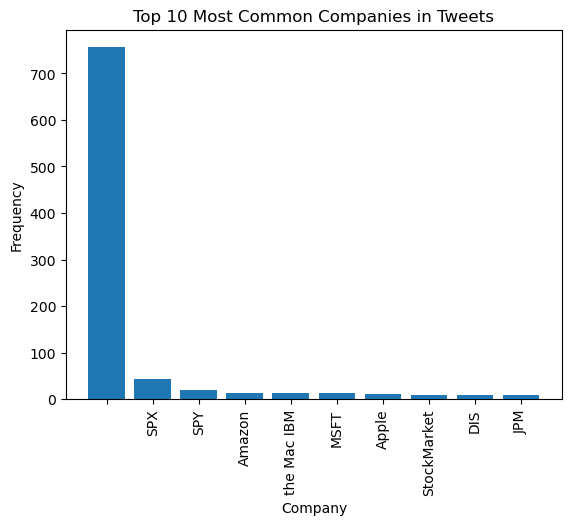

In [266]:
import matplotlib.pyplot as plt

count_company = positive_tweets['companies'].value_counts().head(10)
plt.bar(count_company.index, count_company.values)
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Companies in Tweets')
plt.xticks(rotation=90)

plt.show()


# NER analysis on Negative Tweets

In [267]:
negative_tweets['companies'] = negative_tweets['clean_text'].apply(lambda x: ', '.join(extract_company(x)))

/var/folders/xt/yjtl4jys31763jfkqwb14p1c0000gn/T/ipykernel_4920/2952604004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['companies'] = negative_tweets['clean_text'].apply(lambda x: ', '.join(extract_company(x)))


In [268]:
negative_tweets['Persons'] = negative_tweets['clean_text'].apply(lambda x: ', '.join(extract_persons(x)))

/var/folders/xt/yjtl4jys31763jfkqwb14p1c0000gn/T/ipykernel_4920/3312958681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['Persons'] = negative_tweets['clean_text'].apply(lambda x: ', '.join(extract_persons(x)))


In [269]:
negative_tweets['products'] = negative_tweets['clean_text'].apply(lambda x: ', '.join(extract_products(x)))

/var/folders/xt/yjtl4jys31763jfkqwb14p1c0000gn/T/ipykernel_4920/1234817489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['products'] = negative_tweets['clean_text'].apply(lambda x: ', '.join(extract_products(x)))


In [270]:
negative_tweets.head()

,id,created_at,text,sentiment,clean_text,companies,Persons,products
6,472959,09-06-2020,$863.69 Million in Sales Expected for Spirit A...,-0.10,86369 Million in Sales Expected for Spirit Aer...,Spirit AeroSystems Holdings Inc,,
38,523018,15-06-2020,RT @jadid: Green suites the #StockMarket . The...,-0.10,Green suites the StockMarket The market cont...,"StockMarket, DJI NDX SPX",,
42,572226,18-06-2020,RT @SheepKnowMore: Fake outrage. $FB is an inv...,-0.25,Fake outrage FB is an invaluable Deep State e...,Deep State,,
59,868308,12-07-2020,Tenaris SA $TS Expected to Post Quarterly Sale...,-0.10,Tenaris SA TS Expected to Post Quarterly Sales...,"Tenaris SA TS Expected, Post Quarterly Sales",,
67,270008,04-05-2020,@CNBCFastMoney $AAPL-- DUMP DUMP. OVERVALUED A...,-0.50,AAPL DUMP DUMP OVERVALUED AND EXPENSIVE JUNK,AAPL DUMP DUMP,,


In [271]:
# we count the organizations/companies from the positive tweets 
count_companies_nega = negative_tweets['companies'].value_counts()
count_companies
count_companies_nega.head()

         301
SPX       32
JPM        6
Pepsi      5
DIS        5
Name: companies, dtype: int64

In [289]:
negative_tweets['companies'].value_counts()

                              301
SPX                            32
JPM                             6
Pepsi                           5
DIS                             5
                             ... 
BAC C                           1
SPX NDX IWM                     1
Disney Hits, DIS ROKU NFLX      1
DOW NQ NQ                       1
YTD                             1
Name: companies, Length: 401, dtype: int64

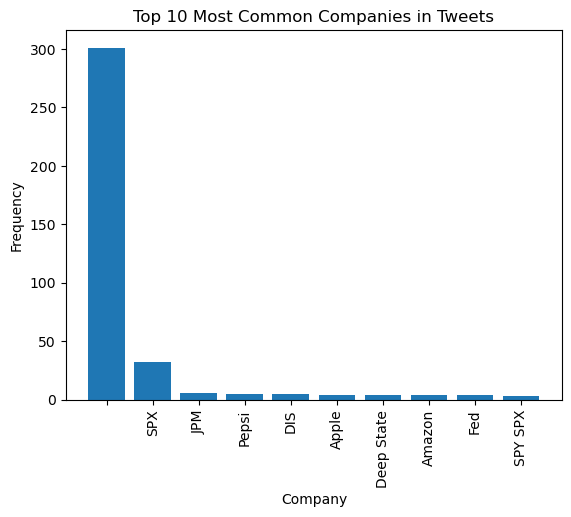

In [295]:
count_companyN = negative_tweets['companies'].value_counts().head(10)
plt.bar(count_companyN.index, count_companyN.values)
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Companies in Tweets')
plt.xticks(rotation=90)
plt.show()

# Topic Modelling positive tweets

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [274]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [275]:
dtm = tfidf.fit_transform(positive_tweets['clean_text'])

In [276]:
dtm

<2080x3230 sparse matrix of type '<class 'numpy.float64'>'
	with 25333 stored elements in Compressed Sparse Row format>

In [277]:
from sklearn.decomposition import NMF

In [278]:
nmf_model = NMF(n_components=10,random_state=42)

In [279]:
nmf_model.fit(dtm)

/Users/mikey/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/mikey/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10, random_state=42)

In [280]:
# we get the top 10 topics from the positve tweets
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

/Users/mikey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


THE TOP 10 WORDS FOR TOPIC #0
['futures', 'right', 'higher', 'vix', 'ndx', 'es', 'qqq', 'es_f', 'spy', 'spx']


THE TOP 10 WORDS FOR TOPIC #1
['money', 'investment', 'news', 'good', 'buy', 'markets', 'economy', 'stockmarket', 'investing', 'stocks']


THE TOP 10 WORDS FOR TOPIC #2
['nvda', 'amd', 'ba', 'googl', 'nflx', 'tsla', 'msft', 'fb', 'amzn', 'aapl']


THE TOP 10 WORDS FOR TOPIC #3
['apple', 'aapl', 'ibm', 'came', 'le', 'spending', 'innovation', 'mac', 'dollars', 'rampd']


THE TOP 10 WORDS FOR TOPIC #4
['nasdaq', 'rise', 'information', 'noticeable', 'zeitgeist', 'ref', 'detected', 'visit', 'markets', 'dataswarm']


THE TOP 10 WORDS FOR TOPIC #5
['iphone', 'filing', 'shares', 'alltime', 'apple', 'day', 'time', 'highs', 'high', 'new']


THE TOP 10 WORDS FOR TOPIC #6
['abt', 'fast', 'pep', 'unh', 'jnj', 'earnings', 'gs', 'wfc', 'bac', 'jpm']


THE TOP 10 WORDS FOR TOPIC #7
['walt', 'cast', 'orlando', 'representing', 'union', 'members', 'world', 'confirmed', 'just', 'disney']


THE T

# Topic Modelling negative tweets

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [282]:
tfidfn = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [283]:
dtma = tfidfn.fit_transform(negative_tweets['clean_text'])

In [284]:
dtma

<778x1416 sparse matrix of type '<class 'numpy.float64'>'
	with 8233 stored elements in Compressed Sparse Row format>

In [285]:
from sklearn.decomposition import NMF

In [286]:
nmf_modeln = NMF(n_components=10,random_state=42)

In [287]:
nmf_modeln.fit(dtma)

/Users/mikey/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=10, random_state=42)

In [288]:
# we get the top 10 topics from the positve tweets
for index,topic in enumerate(nmf_modeln.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfidfn.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['stock', 'look', 'game', 'did', 'dis', 'day', 'apple', 'bad', 'just', 'aapl']


THE TOP 10 WORDS FOR TOPIC #1
['oncology', '2020', 'earn', 'q2', 'announce', 'stocks', 'post', 'expected', 'share', 'earnings']


THE TOP 10 WORDS FOR TOPIC #2
['qqq', 'long', 'spy', 'goog', 'ba', 'nflx', 'msft', 'tsla', 'fb', 'amzn']


THE TOP 10 WORDS FOR TOPIC #3
['rut', 'ndx', 'es', 'qqq', 'market', 'nq', 'dow', 'es_f', 'spy', 'spx']


THE TOP 10 WORDS FOR TOPIC #4
['term', 'spx', 'usd', 'spx500', 'sampp', 'btc', '500', 'trade8', 'short', 'long']


THE TOP 10 WORDS FOR TOPIC #5
['resorts', 'buy', 'analysts', 'stocks', 'receives', 'hold', 'given', 'brokerages', 'recommendation', 'average']


THE TOP 10 WORDS FOR TOPIC #6
['folks', 'reali', 'dissenting', 'voices', 'mass', 'tone', 'fb', 'different', 'suppression', 'fearful']


THE TOP 10 WORDS FOR TOPIC #7
['post', 'holdings', 'corp', 'quarterly', 'stocks', 'billion', 'million', 'expected', 'quarter', 'sales']


THE TOP 10 WO

/Users/mikey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
